## 环境准备

常见的依赖类库有 

- yfinance: 用于从 Yahoo Finance 获取金融数据的库。它允许用户下载股票、期货、外汇等的历史数据和实时数据。
- numpy: 用于科学计算的库，提供了高性能的多维数组对象（ndarray）和各种用于操作数组的函数。
- pandas：用于数据操作和分析的强大库。它提供了易于使用的数据结构和数据分析工具
- ta-lib: 用于技术分析的库，提供了大量的技术指标计算函数。常用于金融市场分析。

```
conda install -c conda-forge yfinance matplotlib ta-lib pandas numpy
```

[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           
2020-05-01  50.333332  51.518002  45.535999  46.754665  46.754665  487977000   
2020-05-04  46.733334  50.799999  46.533333  50.745998  50.745998  288556500   
2020-05-05  52.652668  53.261333  50.812000  51.214001  51.214001  254875500   
2020-05-06  51.766666  52.653332  50.740665  52.172001  52.172001  166848000   
2020-05-07  51.813999  53.093334  51.490002  52.002666  52.002666  172915500   

            MA10  MA50  MA200  RSI  
Date                                
2020-05-01   NaN   NaN    NaN  NaN  
2020-05-04   NaN   NaN    NaN  NaN  
2020-05-05   NaN   NaN    NaN  NaN  
2020-05-06   NaN   NaN    NaN  NaN  
2020-05-07   NaN   NaN    NaN  NaN  


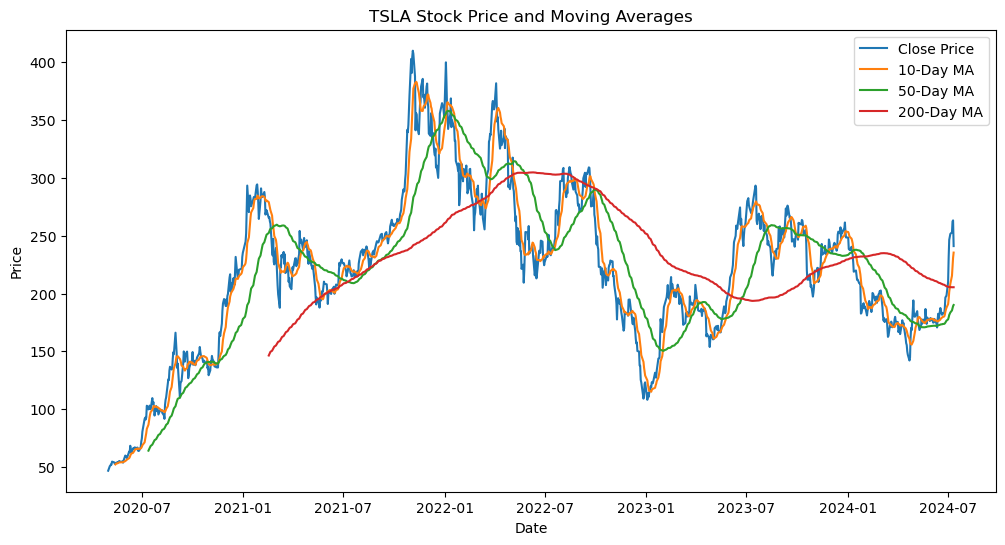

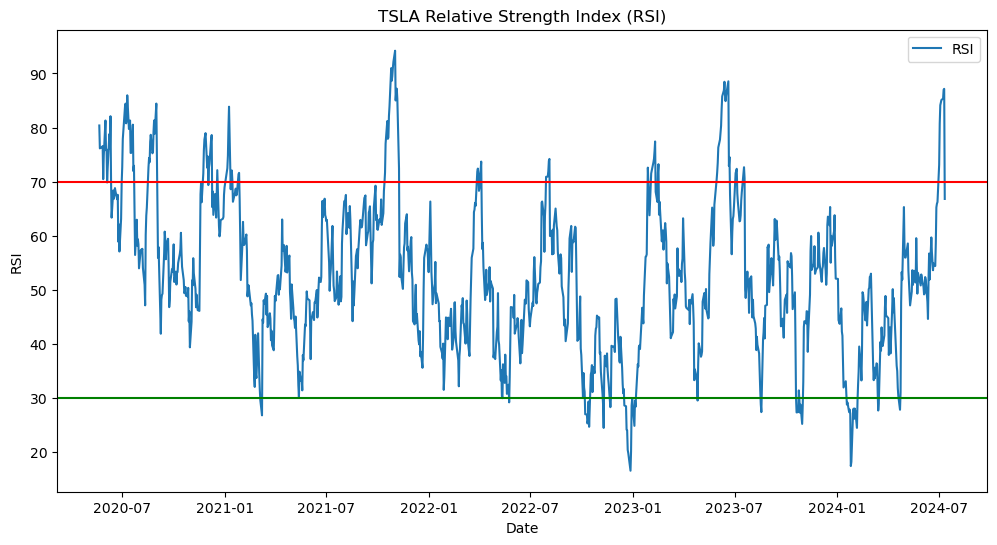

In [7]:
# 导入库
import yfinance as yf
import pandas as pd
import talib
import matplotlib.pyplot as plt

# 获取苹果公司股票的历史数据
ticker = 'TSLA'
stock_data = yf.download(ticker, start='2020-05-01', end='2024-07-12')

# 计算50日和200日移动平均线
stock_data['MA10'] = talib.SMA(stock_data['Close'], timeperiod=10)
stock_data['MA50'] = talib.SMA(stock_data['Close'], timeperiod=50)
stock_data['MA200'] = talib.SMA(stock_data['Close'], timeperiod=200)

# 计算14日相对强弱指数
stock_data['RSI'] = talib.RSI(stock_data['Close'], timeperiod=14)

# 查看数据的前几行
print(stock_data.head())

# 可视化
# 绘制股价和移动平均线
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Close'], label='Close Price')
plt.plot(stock_data['MA10'], label='10-Day MA')
plt.plot(stock_data['MA50'], label='50-Day MA')
plt.plot(stock_data['MA200'], label='200-Day MA')
plt.legend()
plt.title(f'{ticker} Stock Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# 绘制相对强弱指数
plt.figure(figsize=(12, 6))
plt.plot(stock_data['RSI'], label='RSI')
plt.axhline(y=70, color='r', linestyle='-')
plt.axhline(y=30, color='g', linestyle='-')
plt.legend()
plt.title(f'{ticker} Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.show()


In [2]:
stock_data['macd'], stock_data['macdsignal'], stock_data['macdhist'] = talib.MACD(stock_data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
# 查看结果
print(stock_data[['Close', 'macd', 'macdsignal', 'macdhist']].tail())

                 Close      macd  macdsignal  macdhist
Date                                                  
2024-05-24  179.240005  1.949562    1.733942  0.215620
2024-05-28  176.750000  1.784405    1.744035  0.040370
2024-05-29  176.190002  1.590002    1.713228 -0.123227
2024-05-30  178.789993  1.626978    1.695978 -0.069000
2024-05-31  178.080002  1.580770    1.672937 -0.092167


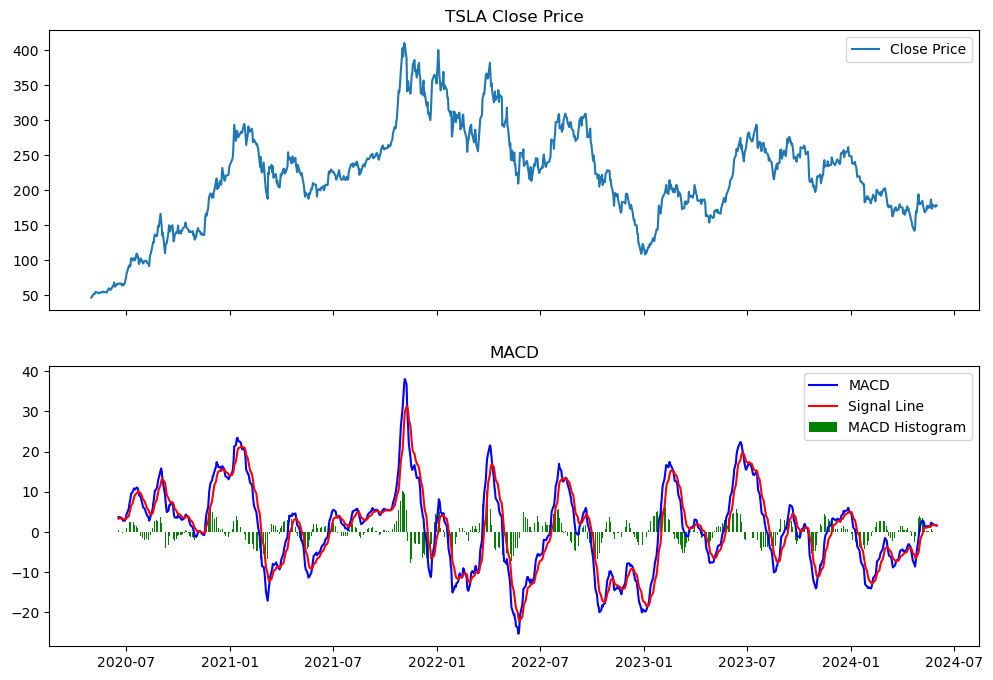

In [4]:
# 创建子图
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# 绘制收盘价
ax1.plot(stock_data.index, stock_data['Close'], label='Close Price')
ax1.set_title('TSLA Close Price')
ax1.legend()

# 绘制 MACD 和信号线
ax2.plot(stock_data.index, stock_data['macd'], label='MACD', color='b')
ax2.plot(stock_data.index, stock_data['macdsignal'], label='Signal Line', color='r')
ax2.bar(stock_data.index, stock_data['macdhist'], label='MACD Histogram', color='g')
ax2.set_title('MACD')
ax2.legend()

# 显示图表
plt.show()

上面我们都是利用美股代码查询，那么是否可以查询